In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd
from os.path import exists
import wget
from zipfile import ZipFile

<br>

### Download and read BRICK projections

In [42]:
brickfile = "https://zenodo.org/record/6461560/files/sneasybrick_projections_csv.zip"
results_dir = getcwd()+"/ciam-code/data/lslr/"

In [68]:
rcp_scenarios = ["RCP26","RCP45","RCP60","RCP85"]
filepaths_gmsl = {rcp : results_dir+"projections_csv/"+rcp+"/projections_gmsl_"+rcp+"_sneasybrick_20M_19-02-2022.csv" for rcp in rcp_scenarios}
filepaths_map = {rcp : results_dir+"projections_csv/"+rcp+"/projections_MAP_"+rcp+"_sneasybrick_20M_19-02-2022.csv" for rcp in rcp_scenarios}


In [78]:
if not ([exists(list(filepaths_gmsl.values())[k]) for k in range(4)] and
        [exists(list(filepaths_map.values())[k]) for k in range(4)]):
    wget.download(brickfile, out=results_dir)
    with ZipFile(results_dir+"sneasybrick_projections_csv.zip", "r") as zipObj:
        zipObj.extractall(results_dir)

In [80]:
dfGMSL = {rcp : pd.read_csv(filepaths_gmsl[rcp]) for rcp in rcp_scenarios}
dfMAP = {rcp : pd.read_csv(filepaths_map[rcp]) for rcp in rcp_scenarios}

<br>

### Normalize all relative to 1995-2014 means

In [86]:
years = dfMAP["RCP26"]["YEAR"]

In [122]:
for rcp in rcp_scenarios:
    offset = dfMAP[rcp].loc[(dfMAP[rcp]["YEAR"] >= 1995) & (dfMAP[rcp]["YEAR"] <= 2014),"GMSL"].mean()
    dfMAP[rcp]["GMSL"] = dfMAP[rcp]["GMSL"] - offset
    dfGMSL[rcp] = dfGMSL[rcp] - dfGMSL[rcp].loc[(dfMAP[rcp]["YEAR"] >= 1995) & (dfMAP[rcp]["YEAR"] <= 2014)].mean(axis=0)

<br> 

### Defining useful variables for plotting

In [188]:
quantiles = np.array([0.025,0.05,0.17,0.25,0.50,0.75,0.83,0.95,0.975])
qGMSL = {rcp : dfGMSL[rcp].quantile(quantiles, axis=1) for rcp in rcp_scenarios}

In [189]:
rcp_shading = {"RCP26" : ( 67/255, 147/255, 195/255),
               "RCP45" : (146/255, 197/255, 222/255),
               "RCP60" : (204/255, 174/255, 113/255),
               "RCP85" : (252/255, 209/255, 197/255)}
rcp_lines = {"RCP26" : (  0/255,  52/255, 102/255),
             "RCP45" : (112/255, 160/255, 205/255),
             "RCP60" : (196/255, 121/255,   0/255),
             "RCP85" : (153/255,   0/255,   2/255)}

<br>

### Comparison to IPCC AR6 

Ch 9, Table 9.8, year 2100:
* RCP2.6: 
  * MICI: 0.41 (0.35–0.48) m
  * SEJ: 0.53 (0.38–0.79) m
* RCP8.5:
  * MICI: 0.99 (0.82–1.19) m
  * SEJ: 1.00 (0.70–1.60) m

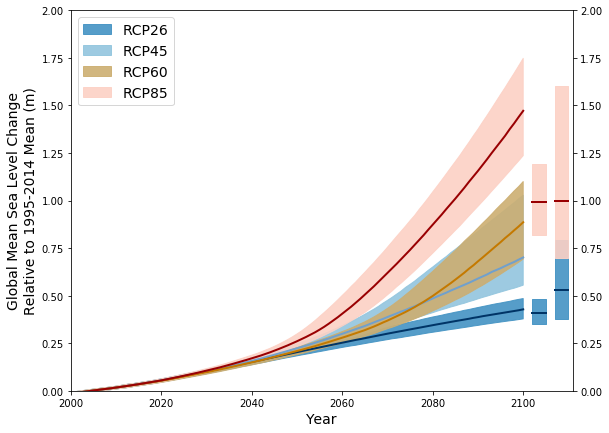

In [216]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years[:251], np.array(qGMSL[rcp].iloc[np.where(quantiles==0.17)])[0][:251], 
                    np.array(qGMSL[rcp].iloc[np.where(quantiles==0.83)])[0][:251], alpha=0.9, color=rcp_shading[rcp], label=rcp)
#    ax.plot(years,dfMAP[rcp]["GMSL"], linewidth=2, color=rcp_lines[rcp])
    ax.plot(years[:251],np.array(qGMSL[rcp].iloc[np.where(quantiles==0.5)])[0][:251], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2111]); ax.set_ylim([0,2]);
ax.fill_between([2102,2105], [0.35]*2, [0.48]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.fill_between([2107,2110], [0.38]*2, [0.79]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.plot([2102,2105],[0.41]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.plot([2107,2110],[0.53]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.fill_between([2102,2105], [0.82]*2, [1.19]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.fill_between([2107,2110], [0.70]*2, [1.60]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.plot([2102,2105],[0.99]*2, linewidth=2, color=rcp_lines["RCP85"])
ax.plot([2107,2110],[1.00]*2, linewidth=2, color=rcp_lines["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)


<br>

Ch 9, Table 9.8, year 2150:
* RCP2.6: 
  * MICI: 0.74 (0.62–0.91) m 
  * SEJ: 0.84 (0.56–1.34) m
* RCP8.5:
  * MICI: 3.48 (2.57–4.82) m 
  * SEJ: 1.79 (1.22–2.94) m

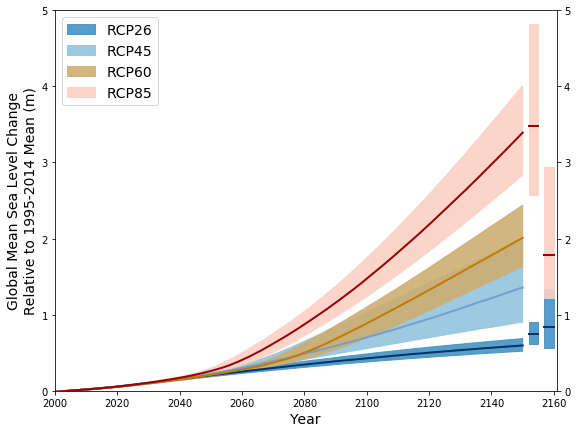

In [223]:
fig,ax = plt.subplots(1,1,figsize=(9,7))
for rcp in rcp_scenarios:
    ax.fill_between(years[:301], np.array(qGMSL[rcp].iloc[np.where(quantiles==0.17)])[0][:301], 
                    np.array(qGMSL[rcp].iloc[np.where(quantiles==0.83)])[0][:301], alpha=0.9, color=rcp_shading[rcp], label=rcp)
#    ax.plot(years,dfMAP[rcp]["GMSL"], linewidth=2, color=rcp_lines[rcp])
    ax.plot(years[:301],np.array(qGMSL[rcp].iloc[np.where(quantiles==0.5)])[0][:301], linewidth=2, color=rcp_lines[rcp])
ax.set_xlim([2000,2161]); ax.set_ylim([0,5]);
ax.fill_between([2152,2155], [0.62]*2, [0.91]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.fill_between([2157,2160], [0.56]*2, [1.34]*2, alpha=0.9, color=rcp_shading["RCP26"])
ax.plot([2152,2155],[0.74]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.plot([2157,2160],[0.84]*2, linewidth=2, color=rcp_lines["RCP26"])
ax.fill_between([2152,2155], [2.57]*2, [4.82]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.fill_between([2157,2160], [1.22]*2, [2.94]*2, alpha=0.9, color=rcp_shading["RCP85"])
ax.plot([2152,2155],[3.48]*2, linewidth=2, color=rcp_lines["RCP85"])
ax.plot([2157,2160],[1.79]*2, linewidth=2, color=rcp_lines["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
plt.legend(loc="upper left", fontsize=14);
plt.tick_params(right=True, labelright=True)
